# 画像処理 ( ^ω^ )

In [1]:
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
img = cv2.imread('Data100/9_data/img/img01.jpg')
img.shape

(1440, 1920, 3)

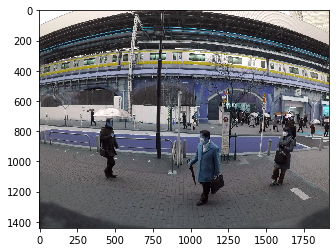

In [3]:
plt.imshow(img)

In [4]:
cap = cv2.VideoCapture('Data100/9_data/mov/mov01.avi')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(f"width: {width} \nheight: {height}\ncount: {count}")

width: 1920.0 
height: 1440.0
count: 401.0


In [ ]:
# while (cap.isOpened()):
#     ret, frame = cap.read()
#     if ret:
#         cv2.imshow(frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release
# cv2.destroyAllWindows

# HOG特徴量を使って人を検知
- HOG: Histgram of Oriented Gradients  (輝度勾配)
- 人のシルエットを見て，そのシルエットの形の特徴を，位置や角度で表現するもの

In [7]:
import cv2

# 準備
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8,8), 'padding': (32,32), 'scale': 1.05, 'hitThreshold': 0, 'finalThreshold': 5}

# 検出
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
human, r = hog.detectMultiScale(gray, **hogParams)
if (len(human)>0):
    for (x,y,w,h) in human:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,255,255), 3)

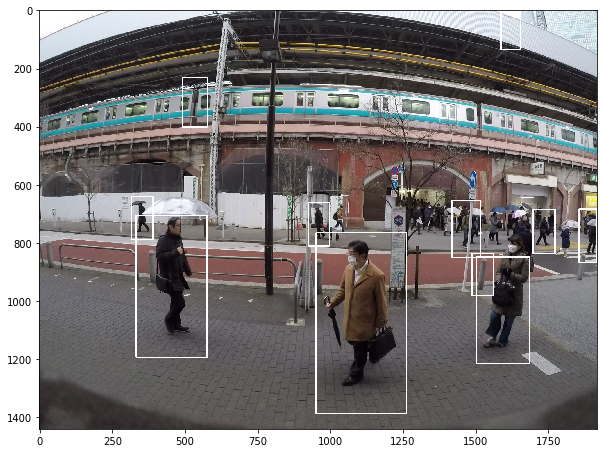

In [10]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(img)

In [15]:
cv2.imwrite('images/cv01.png', img)

True

# 人の顔の検出
- CascadeClassifier

In [52]:
# 準備
cascade_file = 'Data100/9_data/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 正面を向いているイケメンを検出
img_1 = cv2.imread('images/titanic.jpeg')
gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(gray, minSize = (50,50))

# 検出した顔に印をつける
for (x,y,w,h) in face_list:
    color = (0,0,255)
    pen_w = 3
    cv2.rectangle(img_1, (x,y), (x+w, y+h), color, thickness = pen_w)

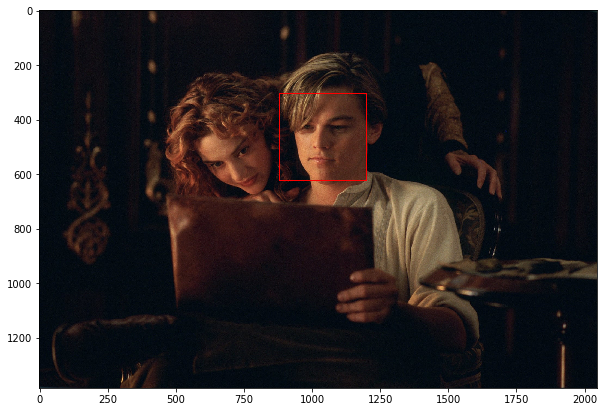

In [53]:
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(img_1)

In [54]:
cv2.imwrite('images/cv02.png',img_1)

True

## タイムラプス

In [57]:
print("タイムラプス生成を開始します")

# 映像取得 #
cap = cv2.VideoCapture("Data100/9_data/mov/mov01.avi")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# hog宣言 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

# タイムラプス作成 #
movie_name = "images/timelapse.avi"
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
video = cv2.VideoWriter(movie_name,fourcc, 30, (width,height))

num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)

            video.write(frame)
    else:
        break
    num = num + 1
video.release()
cap.release()
cv2.destroyAllWindows()
print("タイムラプス生成を終了しました")

タイムラプス生成を開始します
タイムラプス生成を終了しました


In [58]:
type(video)

cv2.VideoWriter

# 人の検出結果をデータフレームに保存

In [71]:
from tqdm import tqdm

print("分析を開始します")
# 映像取得 #
cap = cv2.VideoCapture("Data100/9_data/mov/mov01.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

# hog宣言 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

num = 0
list_df = pd.DataFrame( columns=['time','people'] )
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            tmp_se = pd.Series( [num/fps,len(human) ], index=list_df.columns )
            list_df = list_df.append( tmp_se, ignore_index=True )       
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break
    num = num + 1
cap.release()
cv2.destroyAllWindows()
print("分析を終了しました")

分析を開始します
分析を終了しました


In [72]:
list_df.head()


,time,people
0,0.000000,5.0
1,0.333333,11.0
2,0.666667,11.0
3,1.000000,7.0
4,1.333333,9.0


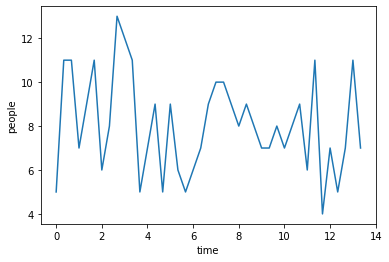

In [75]:
sns.lineplot(x='time', y='people', data=list_df)

In [76]:
fps

30.0

In [77]:
num

401

In [83]:
# 総フレーム数
cap = cv2.VideoCapture("Data100/9_data/mov/mov01.avi")
cap.get(cv2.CAP_PROP_FRAME_COUNT)

401.0

In [84]:
list_df.head()

,time,people
0,0.000000,5.0
1,0.333333,11.0
2,0.666667,11.0
3,1.000000,7.0
4,1.333333,9.0


## 移動平均でノイズを除去

In [86]:
list_df["rolling_3"]=list_df["people"].rolling(3).mean().round(1)
list_df.head()

,time,people,rolling_3
0,0.000000,5.0,NaN
1,0.333333,11.0,NaN
2,0.666667,11.0,9.0
3,1.000000,7.0,9.7
4,1.333333,9.0,9.0


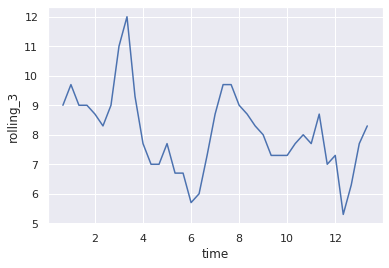

In [95]:
sns.set()
sns.lineplot(x='time', y='rolling_3', data=list_df)

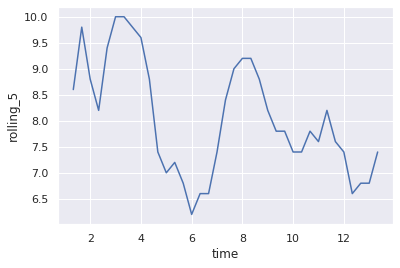

In [98]:
list_df["rolling_5"]=list_df["people"].rolling(5).mean().round(1)
sns.lineplot(x='time', y='rolling_5', data=list_df)

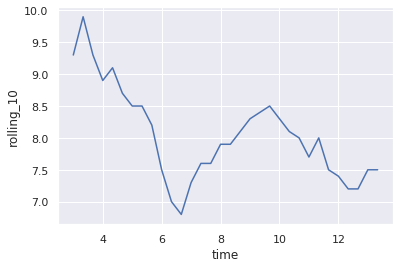

In [99]:
list_df["rolling_10"]=list_df["people"].rolling(10).mean().round(1)
sns.lineplot(x='time', y='rolling_10', data=list_df)

In [91]:
list_df.head()

,time,people,rolling_3,rolling_5,rolling_10
0,0.000000,5.0,NaN,NaN,NaN
1,0.333333,11.0,NaN,NaN,NaN
2,0.666667,11.0,9.0,NaN,NaN
3,1.000000,7.0,9.7,NaN,NaN
4,1.333333,9.0,9.0,8.6,NaN
